In [2]:
import matplotlib.pyplot as plt
import pyshtools as pysh
from pyshtools import constants


In [3]:
pysh.utils.figstyle(rel_width=0.75)
%config InlineBackend.figure_format = 'retina' 

In [4]:
clm = pysh.datasets.Mars.GMM3()

0.00B [00:00, ?B/s]    


In [5]:
clm.info()

kind = 'real'
normalization = '4pi'
csphase = 1
lmax = 120
GM (m3 / s2) = 42828372854187.76
r0 (m) = 3396000.0
Omega (rad / s) = 7.088218127854995e-05
error_kind = 'unspecified'
header = ['3.3960000000000000e+03', '4.2828372854187757e+04', '1.6202815226760665e-05', '120', '120', '1', '0.0000000000000000e+00', '0.0000000000000000e+00']
header2 = None
name = 'GMM3'
epoch = None


In [6]:
clm.set_omega(constants.Mars.omega.value)

a = constants.Mars.a.value
f = constants.Mars.f.value
u0 = constants.Mars.u0.value

In [7]:
print(pysh.constants.Mars.a.value)

3395428.0


In [9]:
print(pysh.constants.Mars.f.value)

0.005227617843759314


In [10]:
print(pysh.constants.Mars.u0.value)

12654875.0


In this paper, the Areoid is defined as a reference equipotential surface, 
which best fits to the shape of Mars in least squares sense.
The estimated gravity potential value of the Areoid from this study,
i.e. W 0=(12,654,875±69) (m2/s2), is used as one of the four fundamental gravity parameters of
Mars namely, {W 0, GM, ω, J 20}, i.e. {Areoid’s gravity potential, gravitational constant of Mars,
angular velocity of Mars, second zonal spherical harmonic of gravitational field expansion of Mars},
to compute a bi-axial reference ellipsoid of Somigliana-Pizzetti type as the hydrostatic approximate figure of Mars. The estimated values of semi-major and semi-minor axis of the computed reference ellipsoid of Mars are (3,395,428±19) (m), and (3,377,678±19) (m), respectively. Finally the computed Areoid is presented with respect to the computed reference ellipsoid. ref-->> A New Reference Equipotential Surface, and Reference Ellipsoid for the Planet Mars

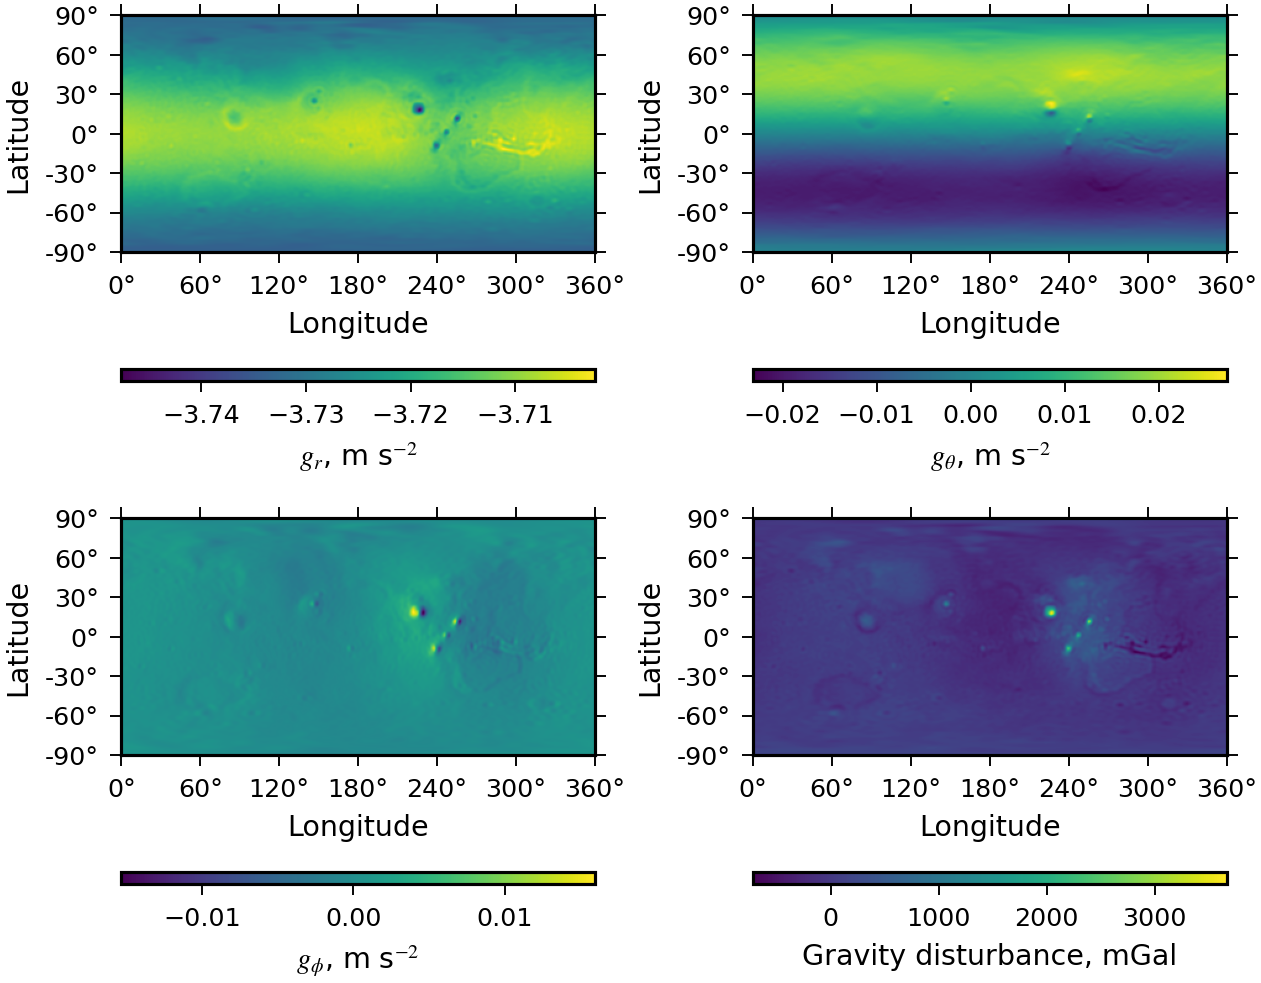

In [11]:
grav = clm.expand(lmax=95, a=a, f=f)
fig2, ax2 = grav.plot(show=False)

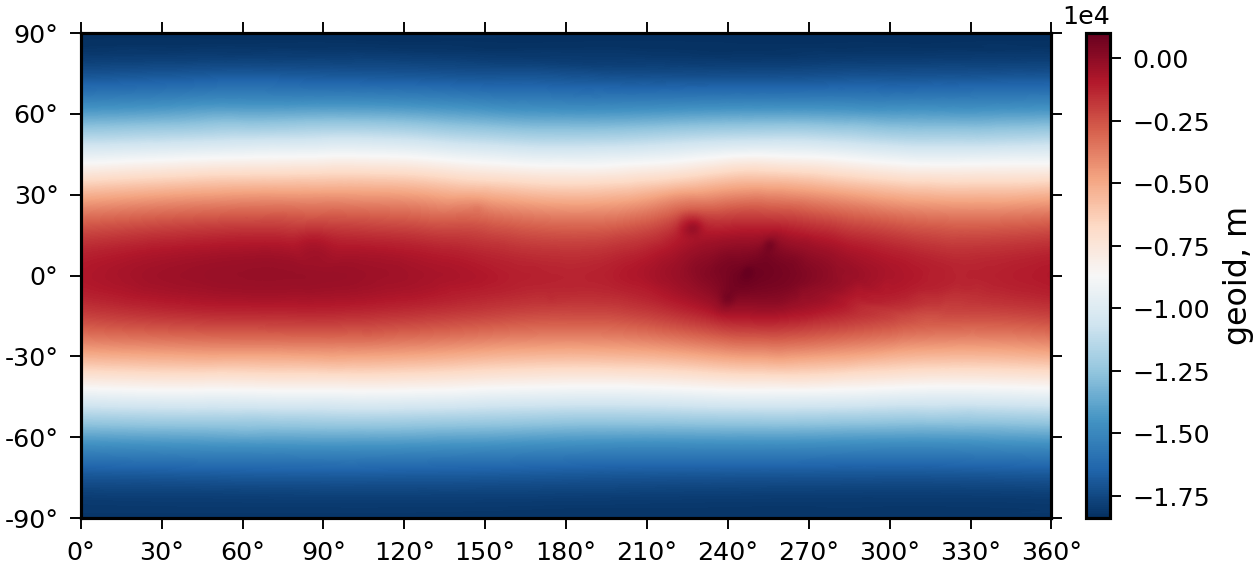

In [13]:
mars_geoid = clm.geoid(u0, lmax=719)
fig4, ax4 = mars_geoid.plot(cmap='RdBu_r', show=False)

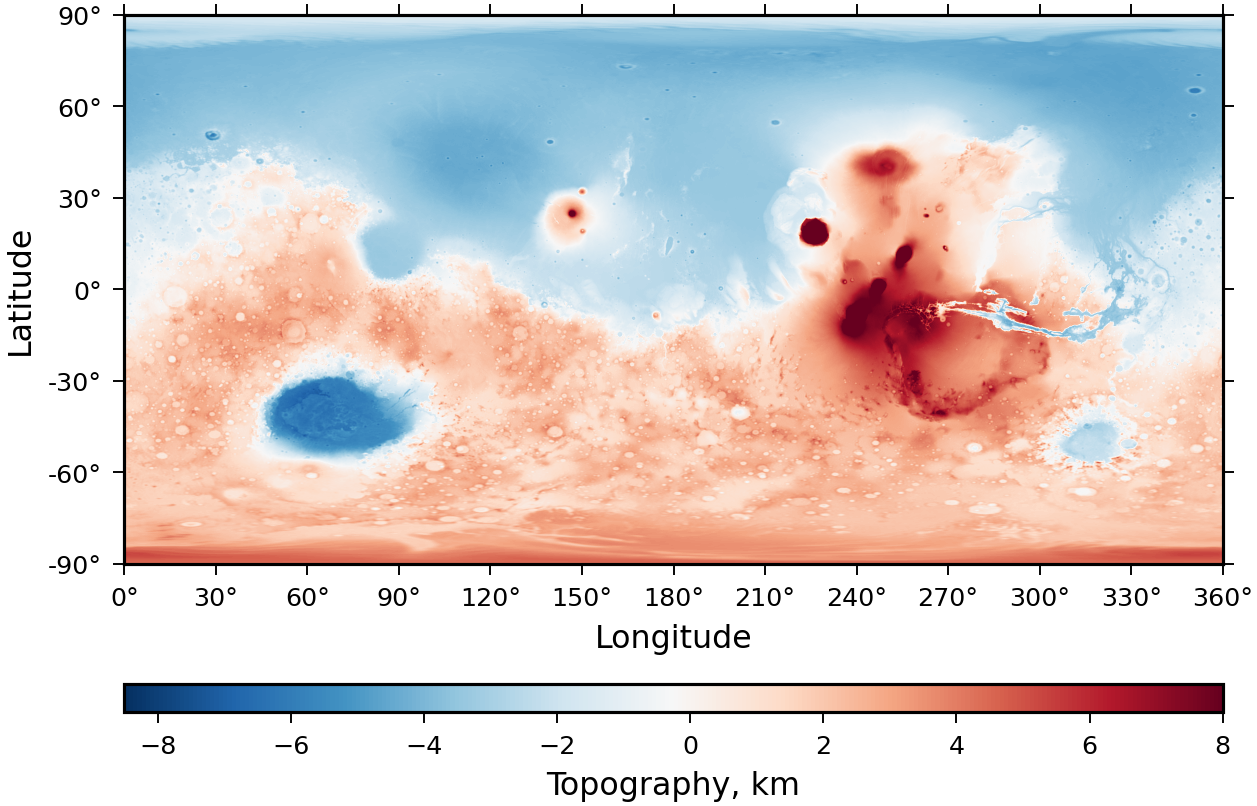

In [14]:
shape = pysh.datasets.Mars.MarsTopo2600(lmax=719)  # read only the first 719 degrees from the file.
shape_grid = shape.expand(grid='DH2')
topo_grid = (shape_grid - mars_geoid.a - mars_geoid.geoid) / 1.e3
fig6, ax6 = topo_grid.plot(colorbar='bottom',
                           cb_label='Topography, km',
                           cmap='RdBu_r',
                           cmap_limits=[-8.5, 8.],
                           show=False)